<a href="https://colab.research.google.com/github/dinesh2018iitism/Learning-Data-Science-Using-AI-From-PW/blob/main/EDA_4_Assignment_Questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"Spotify Data: Popular Hip-hop Artists and Tracks"

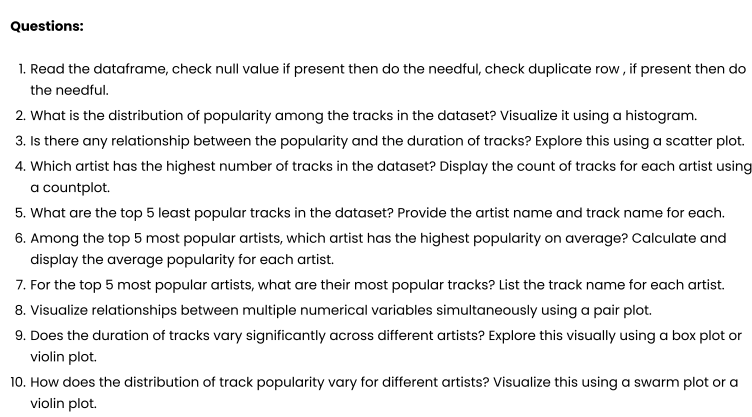

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/sample_data/spotify.csv'
spotify_data = pd.read_csv(file_path)

print("Checking for Null Values:")
print(spotify_data.isnull().sum())

print("Checking for Duplicate Rows:")
print("Duplicate Rows Count:", spotify_data.duplicated().sum())
spotify_data = spotify_data.drop_duplicates()


Checking for Null Values:
Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64
Checking for Duplicate Rows:
Duplicate Rows Count: 27


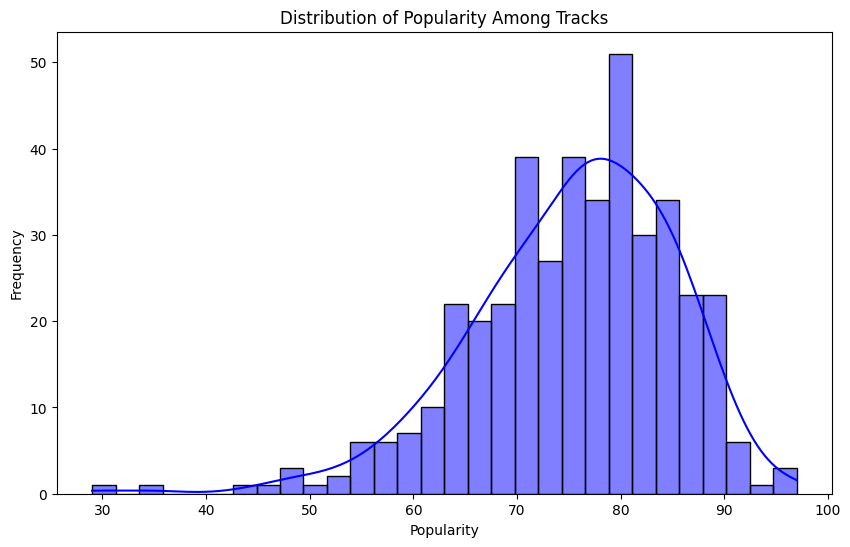

In [2]:
# 2. Distribution of popularity among tracks
plt.figure(figsize=(10, 6))
sns.histplot(spotify_data['Popularity'], kde=True, color='blue', bins=30)
plt.title('Distribution of Popularity Among Tracks')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()


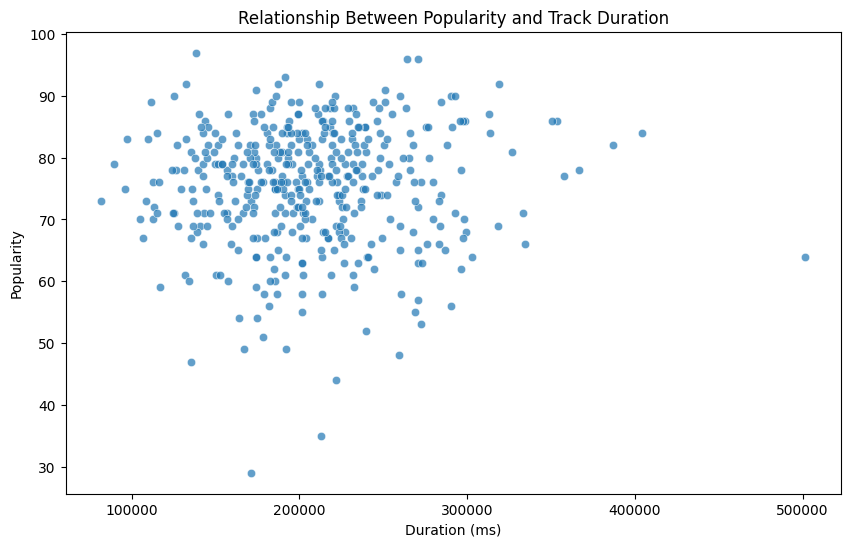

In [3]:
# 3. Relationship between popularity and duration of tracks
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration (ms)', y='Popularity', data=spotify_data, alpha=0.7)
plt.title('Relationship Between Popularity and Track Duration')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.show()

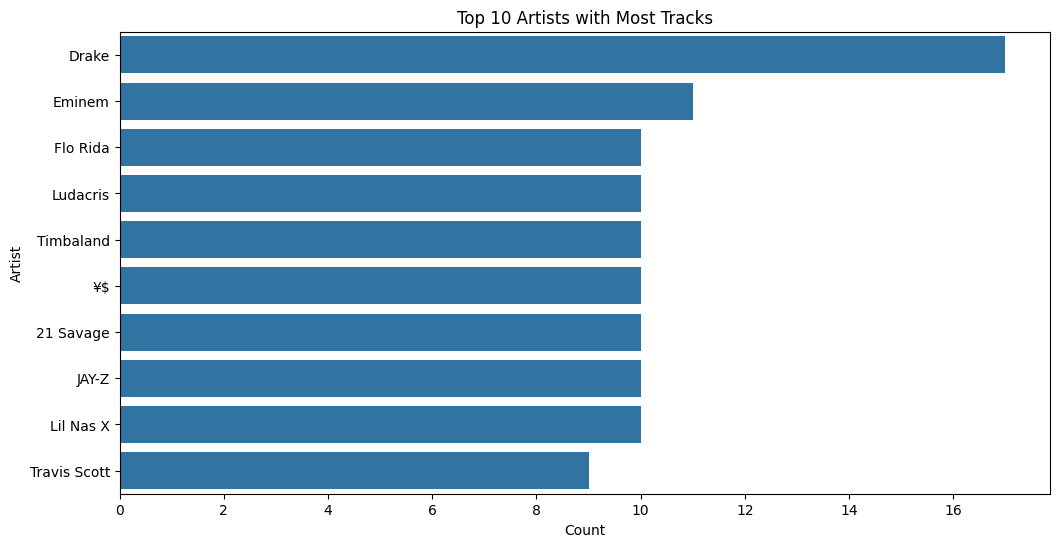

In [4]:
# 4. Artist with the highest number of tracks
plt.figure(figsize=(12, 6))
sns.countplot(y='Artist', data=spotify_data, order=spotify_data['Artist'].value_counts().index[:10])
plt.title('Top 10 Artists with Most Tracks')
plt.xlabel('Count')
plt.ylabel('Artist')
plt.show()

In [5]:
# 5. Top 5 least popular tracks
least_popular_tracks = spotify_data.nsmallest(5, 'Popularity')[['Artist', 'Track Name', 'Popularity']]
print("Top 5 Least Popular Tracks:")
print(least_popular_tracks)

Top 5 Least Popular Tracks:
             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


In [6]:
# 6. Average popularity for the top 5 most popular artists
top_artists = spotify_data['Artist'].value_counts().head(5).index
top_artist_data = spotify_data[spotify_data['Artist'].isin(top_artists)]
avg_popularity_top_artists = top_artist_data.groupby('Artist')['Popularity'].mean().sort_values(ascending=False)
print("Average Popularity of Top 5 Most Popular Artists:")
print(avg_popularity_top_artists)

Average Popularity of Top 5 Most Popular Artists:
Artist
Eminem       83.636364
Drake        82.882353
Flo Rida     78.000000
Timbaland    69.000000
Ludacris     63.000000
Name: Popularity, dtype: float64


In [7]:
# 7. Most popular tracks for the top 5 most popular artists
most_popular_tracks = top_artist_data.loc[top_artist_data.groupby('Artist')['Popularity'].idxmax()][['Artist', 'Track Name', 'Popularity']]
print("Most Popular Tracks by Top 5 Artists:")
print(most_popular_tracks)

Most Popular Tracks by Top 5 Artists:
        Artist                               Track Name  Popularity
0        Drake  Rich Baby Daddy (feat. Sexyy Red & SZA)          92
80      Eminem                               Without Me          90
300   Flo Rida                       Low (feat. T-Pain)          84
371   Ludacris                             My Chick Bad          67
380  Timbaland                            The Way I Are          85


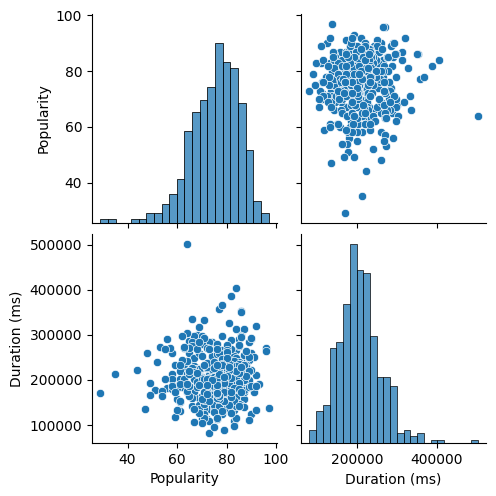

In [8]:
# 8. Pair plot for numerical variables
sns.pairplot(spotify_data[['Popularity', 'Duration (ms)']])
plt.show()

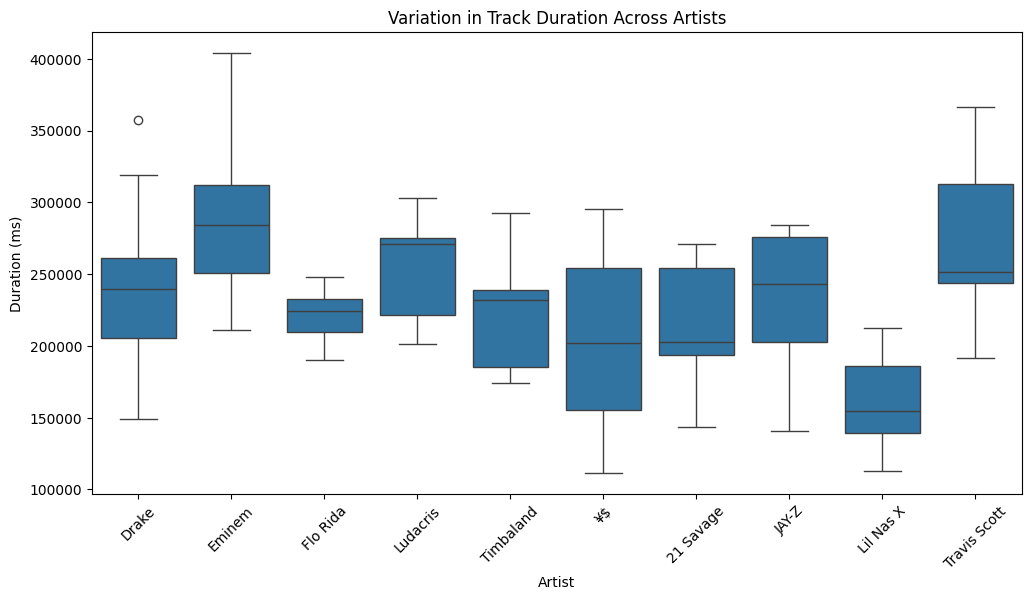

In [9]:
# 9. Variation in track duration across artists
plt.figure(figsize=(12, 6))
sns.boxplot(x='Artist', y='Duration (ms)', data=spotify_data, order=spotify_data['Artist'].value_counts().index[:10])
plt.xticks(rotation=45)
plt.title('Variation in Track Duration Across Artists')
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.show()

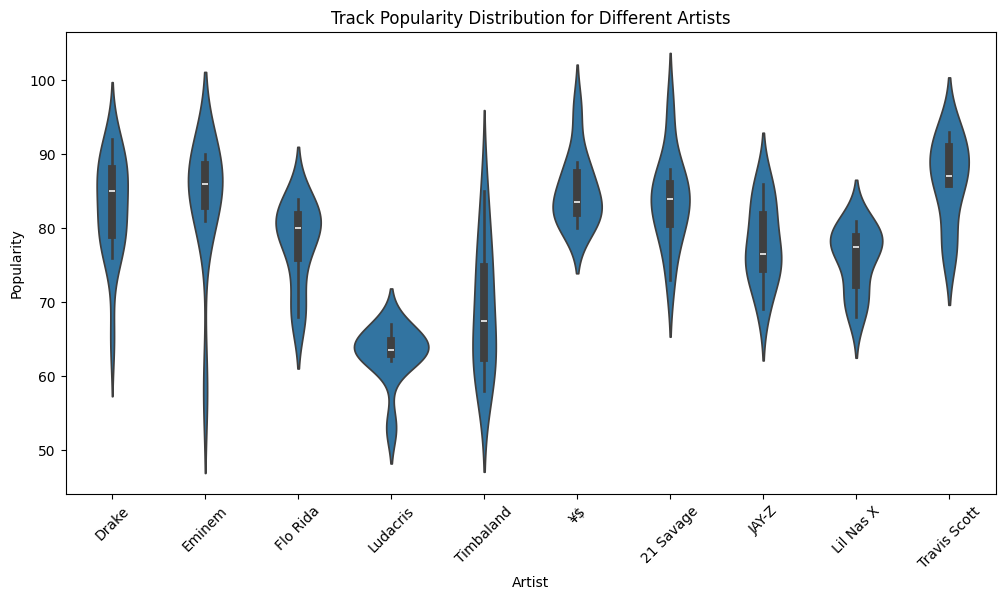

In [10]:
# 10. Distribution of track popularity for different artists
plt.figure(figsize=(12, 6))
sns.violinplot(x='Artist', y='Popularity', data=spotify_data, order=spotify_data['Artist'].value_counts().index[:10])
plt.xticks(rotation=45)
plt.title('Track Popularity Distribution for Different Artists')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.show()
